In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

# 2 Interactions

Text(0.5, 1.0, '2D Interaction non weighted Bias')

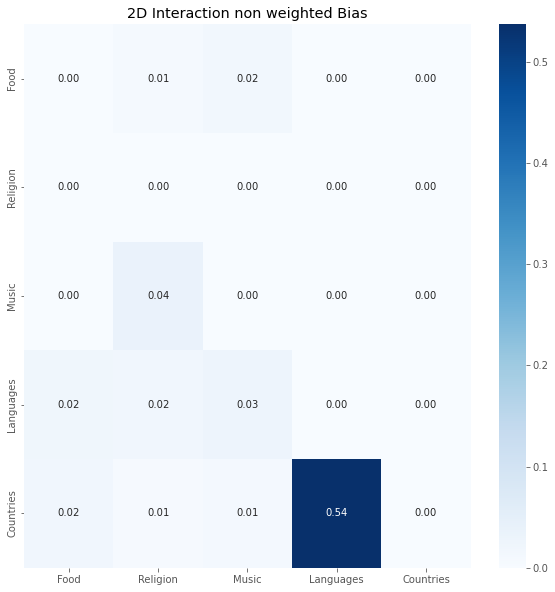

In [5]:
# Plot a 2d heatmap of the 2d interaction bias

# Load the data
cg_2 = json.load(open('Interaction_results/CG_score_2.json'))
mcg_2 = json.load(open('Interaction_results/modified_cg_score_2.json'))

# convert all keys into tuple seprated by comma
cg_2 = {tuple(k.split(',')): v for k, v in cg_2.items()}
mcg_2 = {tuple(k.split(',')): v for k, v in mcg_2.items()}

# assign numbers to each category from the keys in the dictionary
categories = set()
for k in cg_2.keys():
    categories.add(k[0])
    categories.add(k[1])
categories = list(categories)

# create a dataframe with the values
df = pd.DataFrame(columns=categories, index=categories)
for k, v in cg_2.items():
    df.loc[k[0], k[1]] = v
df = df.fillna(0)

# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_title('2D Interaction non weighted Bias')


Text(0.5, 1.0, '2D Interaction weighted Bias')

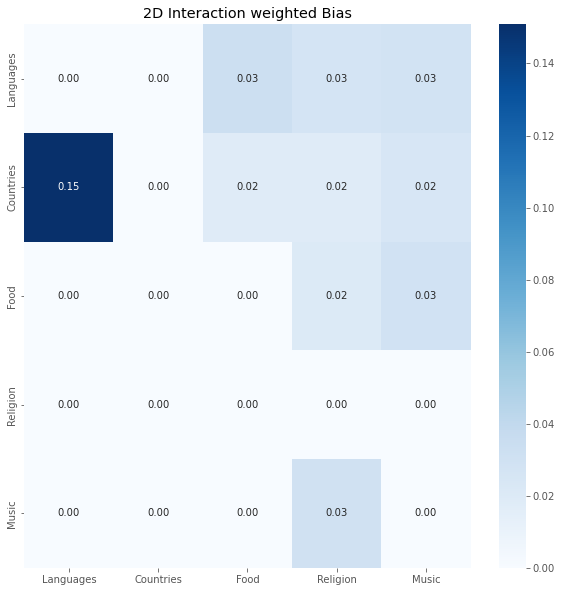

In [10]:
# plot a 2d heatmap of the 2d interaction bias for modified CG
dfc = pd.DataFrame(columns=categories, index=categories)
for k, v in mcg_2.items():
    dfc.loc[k[0], k[1]] = v
dfc = dfc.fillna(0)

# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dfc, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_title('2D Interaction weighted Bias')


# 3 Interactions

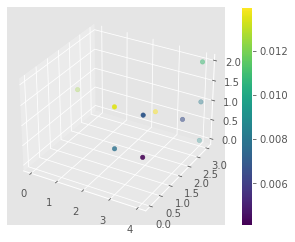

In [16]:
cg_3 = json.load(open('Interaction_results/CG_score_3.json'))
mcg_3 = json.load(open('Interaction_results/modified_cg_score_3.json'))

# convert all keys into tuple seprated by comma
cg_3 = {tuple(k.split(',')): v for k, v in cg_3.items()}
mcg_3 = {tuple(k.split(',')): v for k, v in mcg_3.items()}

# we will use the same number of categories as before
# We have to find a way to represent 4 d data 


# representation one lattice of 3d data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# convert the tuple keys into a list of points in 3d space using the categories
# as the coordinates

# create a list of points
cg3_points = []
for k in cg_3.keys():
    cg3_points.append([categories.index(k[0]), categories.index(k[1]), categories.index(k[2]), cg_3[k]])

mcg_3_points = []
for k in mcg_3.keys():
    mcg_3_points.append([categories.index(k[0]), categories.index(k[1]), categories.index(k[2]), mcg_3[k]])


cg3_points, mcg_3_points = np.array(cg3_points), np.array(mcg_3_points)

img = ax.scatter(cg3_points[:,0], cg3_points[:,1],cg3_points[:,2] , c=cg3_points[:,3], cmap=plt.viridis())
fig.colorbar(img)
plt.show()


In [24]:
cg_3

{('Countries', 'Languages', 'Food'): 0.00900482507050293,
 ('Countries', 'Languages', 'Music'): 0.010872384333049585,
 ('Countries', 'Languages', 'Religion'): 0.008193947533748237,
 ('Countries', 'Food', 'Music'): 0.006973413714512515,
 ('Countries', 'Food', 'Religion'): 0.004138476741534321,
 ('Countries', 'Music', 'Religion'): 0.006520603143368162,
 ('Languages', 'Food', 'Music'): 0.013486929003979577,
 ('Languages', 'Food', 'Religion'): 0.007785202891762964,
 ('Languages', 'Music', 'Religion'): 0.01398626780545624,
 ('Food', 'Music', 'Religion'): 0.012585992218487165}

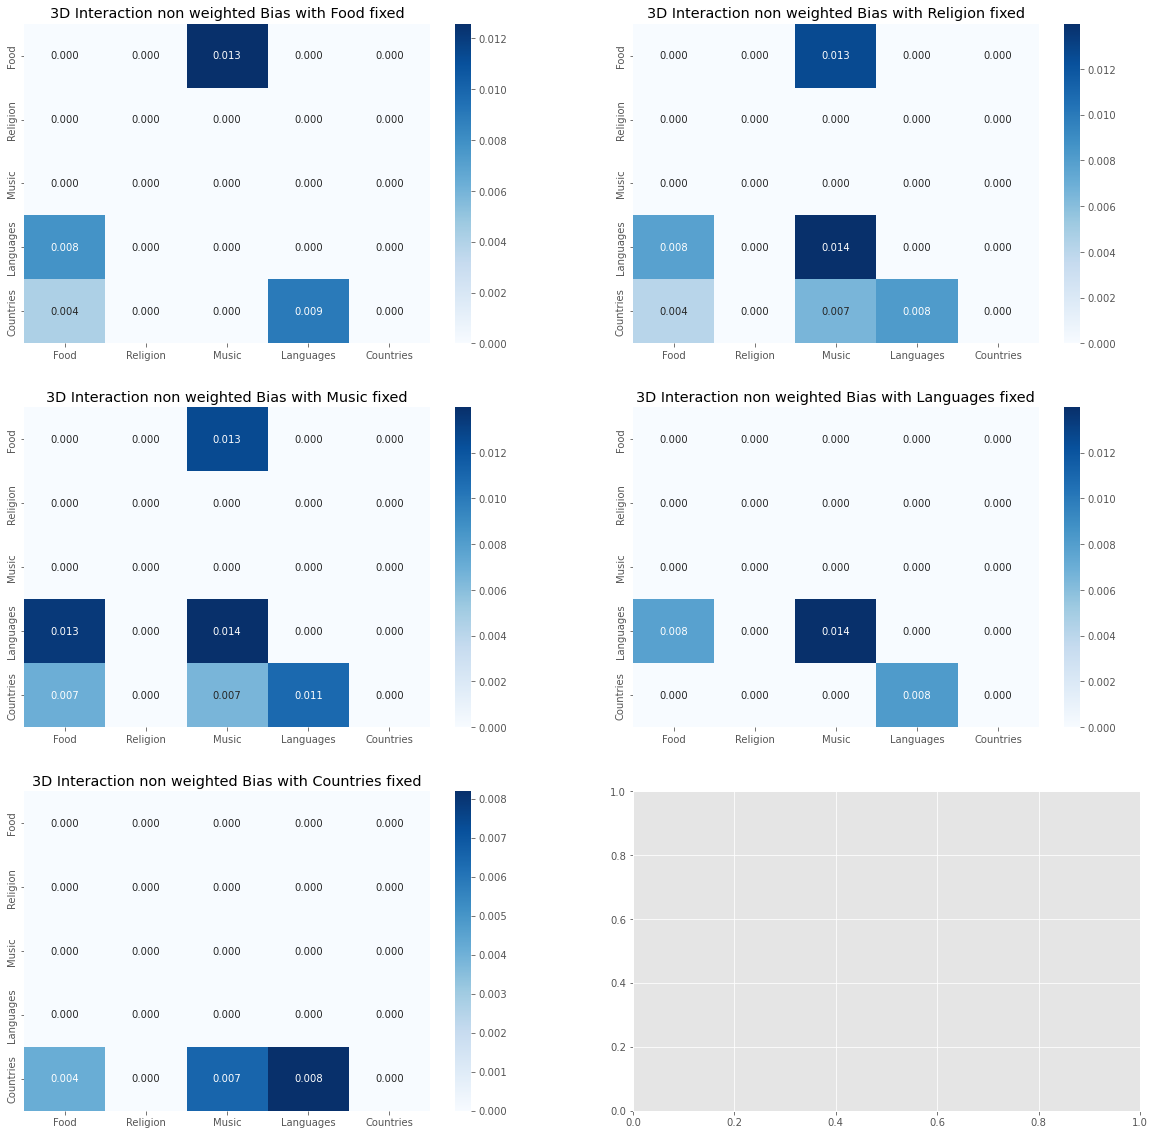

In [28]:
# plot heatmap of the 3d interaction bias by keeping one category fixed
fig, ax = plt.subplots(figsize=(20, 20), nrows=3, ncols=2)
for i, fixed_category in enumerate(categories):
    # create a dataframe with the values
    df = pd.DataFrame(columns=categories, index=categories)
    for k, v in cg_3.items():
        if fixed_category in k:
            # find the index of the fixed category
            idx = k.index(fixed_category)
            # find the other two categories
            other_categories = list(k)
            other_categories.pop(idx)
            df.loc[k[0], k[1]] = v
    df = df.fillna(0)
    sns.heatmap(df, annot=True, fmt='.3f', cmap='Blues', ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title('3D Interaction non weighted Bias with {} fixed'.format(fixed_category))

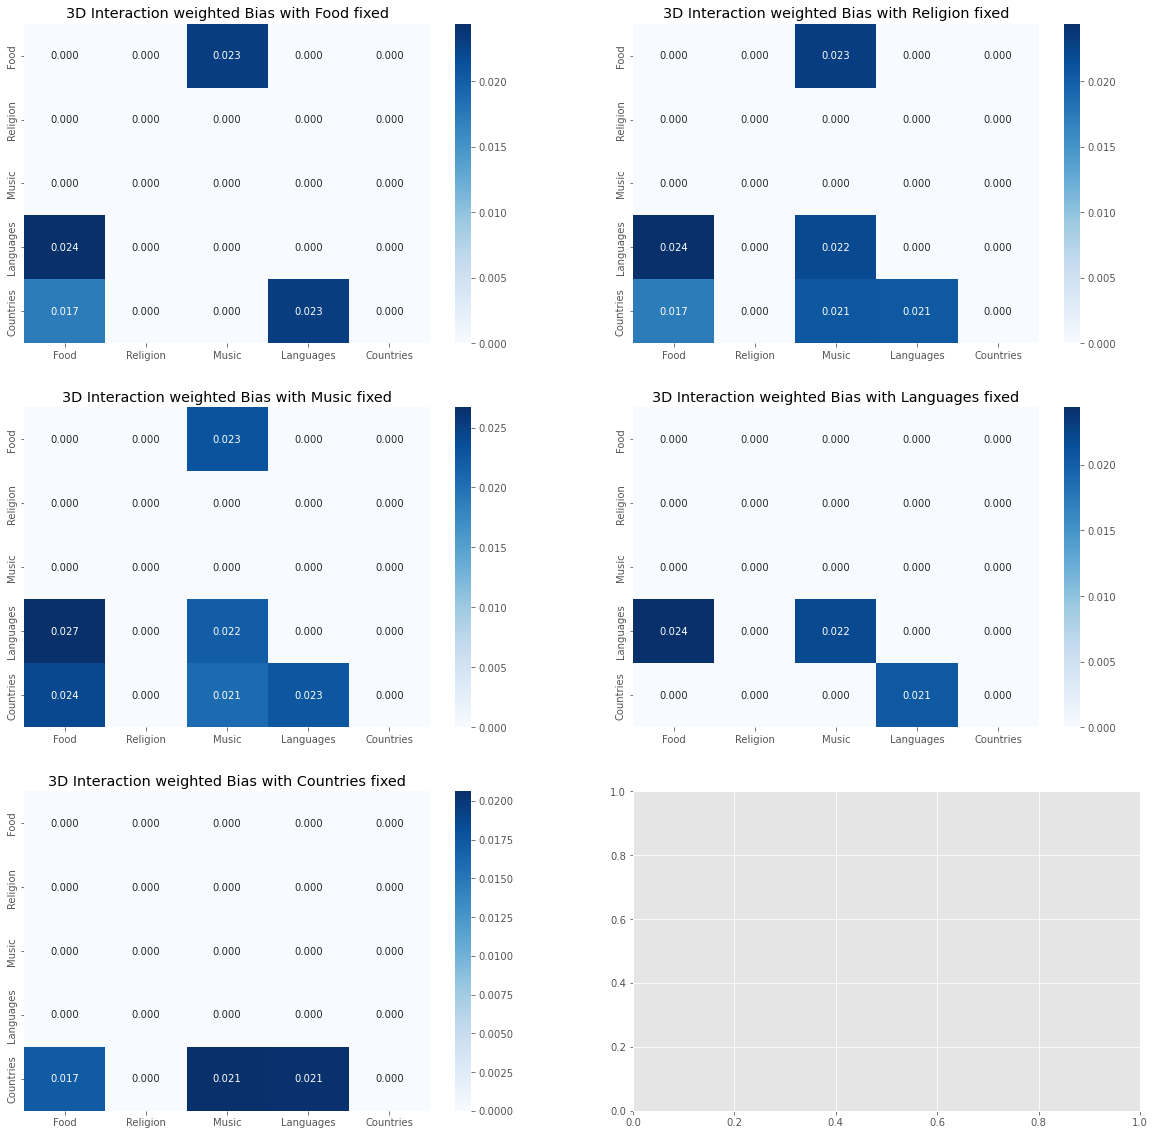

In [29]:
# plot heatmap of the 3d interaction bias by keeping one category fixed
fig, ax = plt.subplots(figsize=(20, 20), nrows=3, ncols=2)
for i, fixed_category in enumerate(categories):
    # create a dataframe with the values
    df = pd.DataFrame(columns=categories, index=categories)
    for k, v in mcg_3.items():
        if fixed_category in k:
            # find the index of the fixed category
            idx = k.index(fixed_category)
            # find the other two categories
            other_categories = list(k)
            other_categories.pop(idx)
            df.loc[k[0], k[1]] = v
    df = df.fillna(0)
    sns.heatmap(df, annot=True, fmt='.3f', cmap='Blues', ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title('3D Interaction weighted Bias with {} fixed'.format(fixed_category))

# 4 Interactions

In [30]:
cg_4 = json.load(open('Interaction_results/CG_score_4.json'))
mcg_4 = json.load(open('Interaction_results/modified_cg_score_4.json'))

# convert all keys into tuple seprated by comma
cg_4 = {tuple(k.split(',')): v for k, v in cg_4.items()}
mcg_4 = {tuple(k.split(',')): v for k, v in mcg_4.items()}

Text(0, 0.5, 'Bias')

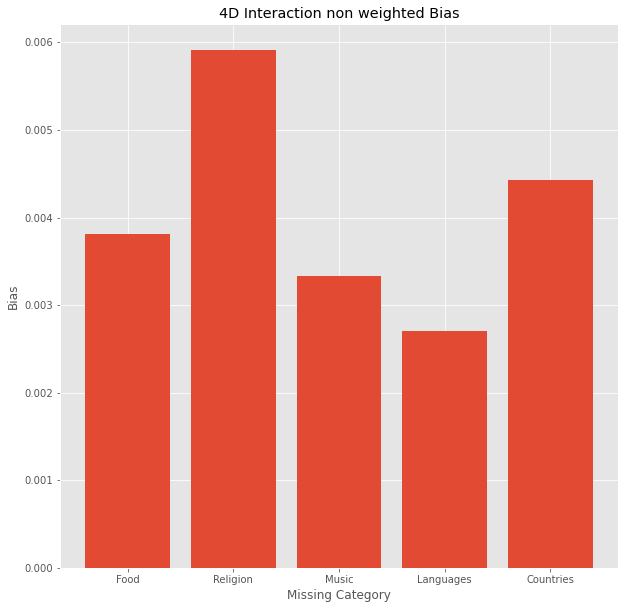

In [33]:
# plot a single bar graph of the 4d bias by mentioning the missing category
fig, ax = plt.subplots(figsize=(10, 10))

x, y = [], []
for missing_category in categories:
    x.append(missing_category)
    # find the tuple with the missing category
    for k, v in cg_4.items():
        if missing_category not in k:
            y.append(v)
            break

ax.bar(x, y)
ax.set_title('4D Interaction non weighted Bias')
ax.set_xlabel('Missing Category')
ax.set_ylabel('Bias')

Text(0, 0.5, 'Bias')

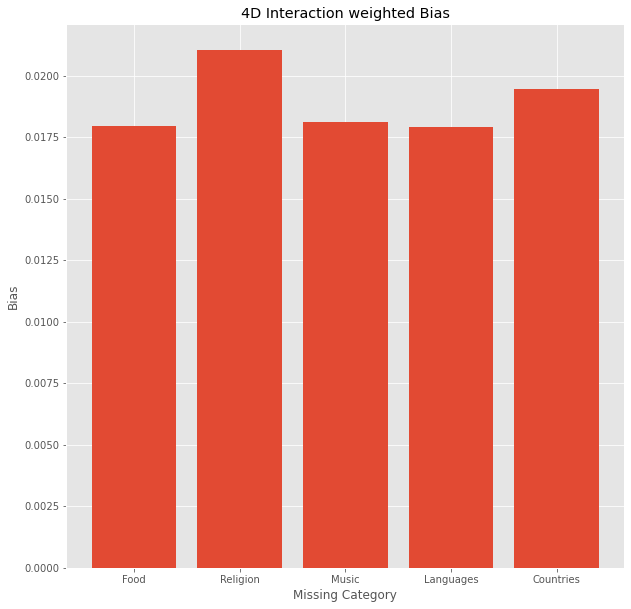

In [34]:
# plot a single bar graph of the 4d bias by mentioning the missing category
fig, ax = plt.subplots(figsize=(10, 10))

x, y = [], []
for missing_category in categories:
    x.append(missing_category)
    # find the tuple with the missing category
    for k, v in mcg_4.items():
        if missing_category not in k:
            y.append(v)
            break

ax.bar(x, y)
ax.set_title('4D Interaction weighted Bias')
ax.set_xlabel('Missing Category')
ax.set_ylabel('Bias')

# 5 Interactions
There is a single number between that represents this bias.


In [35]:
cg_5 = json.load(open('Interaction_results/CG_score_5.json'))
mcg_5 = json.load(open('Interaction_results/modified_cg_score_5.json'))

print('cg_5', cg_5)
print('mcg_5', mcg_5)

cg_5 {'Countries,Languages,Food,Music,Religion': 0.001922595374895377}
mcg_5 {'Countries,Languages,Food,Music,Religion': 0.017195387799186546}


## Seprating positive and negative attribute interaction scores

In [40]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# get the sentiment score of each attribute
def get_sentiment_score(attribute):
    score = sid.polarity_scores(attribute)
    return score['compound']


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gaurishkatlana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
def positive_bias(filename):
    import pandas as pd
    df = pd.read_csv(f"Interaction_results/{filename}")
    # columns are Adjective,Characteristics,Values,Probs,Probs_base
    # find all positive attributes and remove the negative ones
    for i, row in df.iterrows():
        if get_sentiment_score(row['Adjective']) < 0:
            df.drop(i, inplace=True)
    
    # find the bias of the positive attributes
    # group by the adjective then characteristics
    groups =  df.groupby(['Adjective', 'Characteristics'] )

    new_df = pd.DataFrame(columns=['Adjective', 'Characteristics', 'Variance'])
    for name, group in groups:
        # calculate the variance of log(probs)-log(probs_base) for every adjective
        variance = np.var(group['Probs'] - group['Probs_base'])
        new_df = new_df.append({'Adjective': name[0], 'Characteristics': name[1], 'Variance': variance}, ignore_index=True)
    
    # mean the variance for every characteristic
    groups = new_df.groupby(['Characteristics'])
    new_df = pd.DataFrame(columns=['Characteristics', 'Variance'])
    for name, group in groups:
        # calculate the variance of log(probs)-log(probs_base) for every adjective
        variance = np.mean(group['Variance'])
        new_df = new_df.append({'Characteristics': name, 'Variance': variance}, ignore_index=True)
    
    return new_df
        


positive = positive_bias('CG_score_2.csv')

In [58]:
positive['Characteristics'] = positive['Characteristics'].apply(lambda x: x[1:-1].split(','))

TypeError: unhashable type: 'list'

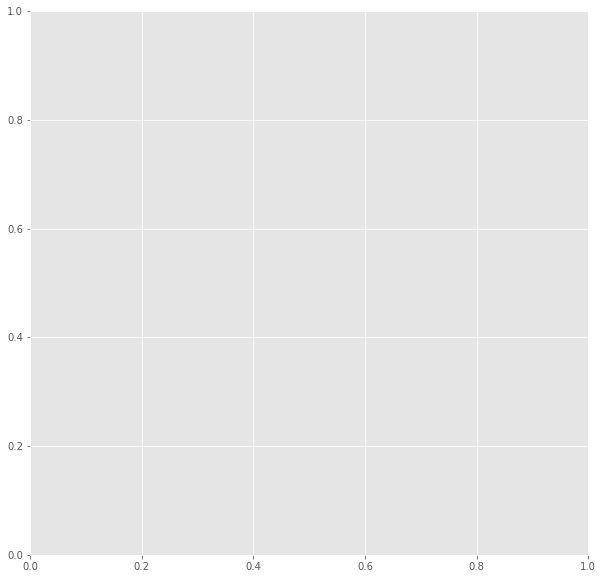

In [60]:
# plot a 2d heatmap of the bias by characteristics
fig, ax = plt.subplots(figsize=(10, 10))
categories = set([ a for a in positive['Characteristics']])
df = pd.DataFrame(columns=categories, index=categories)
for i, row in positive.iterrows():
    for c in row['Characteristics']:
        df.loc[row['Characteristics'][0], row['Characteristics'][1]] = row['Variance']

sns.heatmap(df, annot=True, fmt='.3f', cmap='Blues', ax=ax)